# Name : Pratik Vyas
# Investment Analysis Assignment

### Load data ( companies , round2, sectormapping ) in dataframe

In [1306]:
import pandas as pd

company_file_url='https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt'
round2_file_url='https://cdn.upgrad.com/UpGrad/temp/4c3b5ed0-e5dc-4838-89a2-173d8707d857/rounds2.csv'
sectorMapping_file_url='https://cdn.upgrad.com/UpGrad/temp/231dc91c-0642-470d-a362-29ddcd7142ce/mapping.csv'

companies = pd.read_csv(company_file_url ,sep="\t",encoding='latin-1')
round2 = pd.read_csv(round2_file_url,encoding='latin-1')
sectorMapping = pd.read_csv(sectorMapping_file_url,encoding='latin-1')

In [1307]:
companies['permalink'] = companies['permalink'].str.lower() 
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1308]:
round2['company_permalink'] = round2['company_permalink'].str.lower() 
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Checkpoint 1: Data Cleaning  - Table 1.1 - Understand the Data Set 

__How many unique companies are present in rounds2?__

In [1309]:
round2.company_permalink.nunique()

66370

__How many unique companies are present in companies?__

In [1310]:
companies.permalink.nunique()

66368

__Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N__

In [1311]:
companies[~companies.permalink.isin(round2['company_permalink'])]['permalink'].count()

5

__Merge the two data frames ( companies and rounds2 )__

In [1312]:
master_frame=pd.merge(companies,round2,how="inner", left_on="permalink", right_on="company_permalink" )

In [1359]:
master_frame.count()

permalink                  114942
name                       114941
homepage_url               108810
category_list              111535
status                     114942
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94422
company_permalink          114942
funding_round_permalink    114942
funding_round_type         114942
funding_round_code          31139
funded_at                  114942
raised_amount_usd          114942
primary_category           111535
dtype: int64

__missing value check for raised_amount_usd__

In [1313]:
 # missing value
print(master_frame.isnull().mean() * 100)

#check raised_amount_usd statistics
print( "mean : " , master_frame.raised_amount_usd.mean())
print( "mode : " , master_frame.raised_amount_usd.mode())
print( "median : " , master_frame.raised_amount_usd.median())


permalink                   0.000000
name                        0.000870
homepage_url                5.334865
category_list               2.964104
status                      0.000000
country_code                7.543805
state_code                  9.516974
region                      8.839241
city                        8.836631
founded_at                 17.852482
company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.908945
funded_at                   0.000000
raised_amount_usd          17.386160
dtype: float64
mean :  10426962.020577518
mode :  0    1000000.0
dtype: float64
median :  1680521.0


__fill raised_amount_usd NaN value with mean__

__filter master_frame with raised_amount_usd within 5M to 15M__

In [1314]:
#fill raised_amount_usd NaN with mean
master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"].fillna((master_frame["raised_amount_usd"].mean()))

# filter raised_amount_usd between 5M to 15M
master_frame=master_frame[(master_frame["raised_amount_usd"]) >= 5000000 & (master_frame["raised_amount_usd"] <= 15000000)]


In [1315]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1.042696e+07
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,7.000000e+05
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878e+06
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06


## Checkpoint 2: Funding Type Analysis -  Table 2.1 

__Average funding amount of all type__

In [1316]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()

funding_round_type
angel                    2.875964e+06
convertible_note         3.280738e+06
debt_financing           1.683913e+07
equity_crowdfunding      6.698625e+06
grant                    4.512215e+06
non_equity_assistance    6.598949e+06
post_ipo_debt            1.687046e+08
post_ipo_equity          8.105780e+07
private_equity           6.370435e+07
product_crowdfunding     1.893697e+06
secondary_market         3.228675e+07
seed                     2.919625e+06
undisclosed              1.327482e+07
venture                  1.162352e+07
Name: raised_amount_usd, dtype: float64

__Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)__

In [1317]:
ventures=['venture','angel','seed','private_equity']
filtered_ventures=master_frame.funding_round_type.isin(ventures)

master_frame[filtered_ventures].groupby(['funding_round_type'])['raised_amount_usd'].sum()

funding_round_type
angel             1.752613e+10
private_equity    1.455644e+11
seed              8.910111e+10
venture           6.450242e+11
Name: raised_amount_usd, dtype: float64

## Checkpoint 3: Country Analysis

__top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)__

In [1318]:
top9=pd.DataFrame(master_frame.groupby(['country_code'] )['raised_amount_usd'].sum().nlargest(9)).reset_index()

__For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)__

In [1319]:
top9.sort_values(by='raised_amount_usd', ascending=False)

,country_code,raised_amount_usd
0,USA,7.764523e+11
1,CHN,8.369062e+10
2,GBR,4.264138e+10
3,IND,3.377568e+10
4,CAN,2.362773e+10
5,DEU,1.741048e+10
6,ISR,1.249788e+10
7,RUS,1.215498e+10
8,FRA,1.113474e+10


__Identify the top three English-speaking countries in the data frame top9.__

__Step 1 :__  First load english speaking countries from website 

In [1320]:
import requests 
from bs4 import BeautifulSoup 

URL = "https://www.myenglishpages.com/site_php_files/reading-english-speaking-countries.php"
r = requests.get(URL)   
soup = BeautifulSoup(r.content, 'html5lib') 
table = soup.find_all('table')[0]
df_englishSpeakingCountry=pd.read_html(str(table))[0]


df_englishSpeakingCountry['Country']=df_englishSpeakingCountry['Country'].str.replace('The','')
df_englishSpeakingCountry.sort_values(by="Population",ascending=False).head(10)

,Country,Region,Population
16,India,Asia,1143540000
55,United States,North America,309442000
33,Pakistan,Asia,165449000
32,Nigeria,Africa,148093000
36,Philippines,Asia,90457200
10,Ethiopia,Africa,82101998
54,United Kingdom,Europe,61612300
46,South Africa,Africa,47850700
50,Tanzania,Africa,40454000
19,Kenya,Africa,37538000


__Step 2 :__  secondly load country code list from website

In [1321]:
r = requests.get("https://countrycode.org/")

soup = BeautifulSoup(r.content, 'html5lib') 
tb = soup.find_all('table')[0]
df_contrycode_list = pd.read_html(str(tb))[0]

df_contrycode_list["COUNTRYCODE"]=df_contrycode_list["ISO CODES"].str.split("/").str[1].replace(" ","")
df_countryCode=df_contrycode_list[["COUNTRY","COUNTRYCODE"]]

df_countryCode.head()

,COUNTRY,COUNTRYCODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


__Step 3 :__  merge english speaking country with country code

In [1322]:
df_englishSpeakingCountry["Country"]=df_englishSpeakingCountry["Country"].str.upper().str.strip()
df_countryCode["COUNTRY"]=df_countryCode["COUNTRY"].str.upper().str.strip()

df_country=pd.merge(df_englishSpeakingCountry,df_countryCode,how="inner", left_on="Country", right_on="COUNTRY" ).drop(["COUNTRY","Region"],axis=1)

df_country.sort_values(by="Population",ascending=False).head()


G:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Population,COUNTRYCODE
15,INDIA,1143540000,IND
52,UNITED STATES,309442000,USA
30,PAKISTAN,165449000,PAK
29,NIGERIA,148093000,NGA
33,PHILIPPINES,90457200,PHL


__Step 4 :__  finally find top3 english speaking country code from top9 based on population

In [1323]:
top9["country_code"]=top9["country_code"].str.upper().str.strip()
df_country["COUNTRYCODE"]=df_country["COUNTRYCODE"].str.upper().str.strip()

df_top3_englishSpeakingCountry=(pd.merge(top9,df_country,how="inner", left_on="country_code", right_on="COUNTRYCODE" ).sort_values(by="Population",ascending=False).head(3))


top3EnglishSpeakingCountry=list(df_top3_englishSpeakingCountry["COUNTRYCODE"])
top3EnglishSpeakingCountry

['IND', 'USA', 'GBR']

__filter top3 english speaking country from top9__

In [1324]:
top9[top9.country_code.isin(top3EnglishSpeakingCountry)]

,country_code,raised_amount_usd
0,USA,7.764523e+11
2,GBR,4.264138e+10
3,IND,3.377568e+10


## Checkpoint 4: Sector Analysis 1 — sector analysis.

In [1325]:
sectorMapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


__Create category-sector mapping dataset__ 

In [1326]:
sectors=[
"Automotive & Sports",
"Blanks",
"Cleantech / Semiconductors",
"Entertainment",
"Health",
"Manufacturing",
"News, Search and Messaging",
"Others",
"Social, Finance, Analytics, Advertising"
]

# use melt method
df_melt=pd.melt(sectorMapping, id_vars=['category_list'], value_vars=sectors)
df_cat_sector=df_melt[df_melt['value']==1] 

# rename column
df_category_sectors=df_cat_sector.drop(['value'], axis=1).rename(columns={"variable": "Sectors","category_list" : "category"})

df_category_sectors.head()

,category,Sectors
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


__Extract the primary sector of each category list from the category_list column__

In [1327]:
#Derive primary category : split category_list , seperate by '|'

master_frame["primary_category"]=master_frame["category_list"].str.split("|").str[0]
master_frame[["category_list","primary_category"]].head()

,category_list,primary_category
0,Media,Media
1,Application Platforms|Real Time|Social Network...,Application Platforms
2,Application Platforms|Real Time|Social Network...,Application Platforms
3,Apps|Games|Mobile,Apps
4,Curated Web,Curated Web


__merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).__

In [1328]:
## join on master_frame with df_category_sectors on primary_category
df_category_sectors['category']=df_category_sectors['category'].str.upper()
master_frame['primary_category']= master_frame['primary_category'].str.upper() 




master_frame_category_sectors=pd.merge(master_frame,df_category_sectors,how="left", 
                                       left_on="primary_category", right_on="category" )


## last three columns ( some columns are redundant , these can be dropped but I am keeping it as it is)
master_frame_category_sectors.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_category,category,Sectors
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07,MEDIA,MEDIA,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1.042696e+07,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,7.000000e+05,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878e+06,APPS,APPS,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06,CURATED WEB,CURATED WEB,"News, Search and Messaging"


## Checkpoint 5: Sector Analysis 2

In [1329]:
top3EnglishSpeakingCountry

['IND', 'USA', 'GBR']

##  (1) USA - english speaking country 1

__Maximum investment sector for USA__

In [1332]:
#filter english speaking country ( USA) 
master_frame_category_sectors_USA=master_frame_category_sectors[master_frame_category_sectors.country_code.isin(["USA"])]
# remove unused columns
#master_frame_category_sectors_USA=master_frame_category_sectors_USA.drop(['category', 'category_list_splt'], axis=1) # remove unused column

# sector name
master_frame_category_sectors_USA[filter_max_raised_amount_for_USA]["Sectors"]

106557    Manufacturing
Name: Sectors, dtype: object

__The total number (or count) of investments for each main sector__

In [1333]:

pd.DataFrame(master_frame_category_sectors_USA.groupby(["primary_category"])["primary_category"].count()).rename(columns={'primary_category':'count'}).sort_values(by='count', ascending=False).head()

,count
primary_category,
BIOTECHNOLOGY,8316
SOFTWARE,4885
ADVERTISING,3171
ANALYTICS,2630
HEALTH CARE,2443


__The total amount invested in each main sector in a separate column__

In [1334]:
pd.DataFrame(master_frame_category_sectors_USA.groupby(["primary_category"])["raised_amount_usd"].sum()).sort_values(by='raised_amount_usd', ascending=False).head(10)

,raised_amount_usd
primary_category,
BIOTECHNOLOGY,9.753603e+10
CLEAN TECHNOLOGY,3.707650e+10
SOFTWARE,3.529399e+10
COMMUNICATIONS INFRASTRUCTURE,3.102661e+10
ADVERTISING,2.914728e+10
SEMICONDUCTORS,2.819146e+10
HEALTH CARE,2.536048e+10
ANALYTICS,2.299347e+10
ENTERPRISE SOFTWARE,2.236564e+10


## (2) GBR - English speaking country 2

__Maximum investment sector for GBR__

In [1335]:
#filter top3 english speaking country ( GBR) 
master_frame_category_sectors_GBR=master_frame_category_sectors[master_frame_category_sectors.country_code.isin(["GBR"])]
# remove unused columns
#master_frame_category_sectors_GBR=master_frame_category_sectors_GBR.drop(['category', 'category_list_splt'], axis=1) # remove unused column

# filter max raised amount for GBR
filter_max_raised_amount_for_GBR=master_frame_category_sectors_GBR.raised_amount_usd == master_frame_category_sectors_GBR["raised_amount_usd"].max()

# sector name
master_frame_category_sectors_GBR[filter_max_raised_amount_for_GBR]["Sectors"]

92039    News, Search and Messaging
Name: Sectors, dtype: object

__The total number (or count) of investments for each main sector__

In [1336]:
pd.DataFrame(master_frame_category_sectors_GBR.groupby(["primary_category"])["primary_category"].count()).rename(columns={'primary_category':'count'}).sort_values(by='count', ascending=False).head()

,count
primary_category,
BIOTECHNOLOGY,444
SOFTWARE,368
E-COMMERCE,288
ADVERTISING,284
CURATED WEB,207


__The total amount invested in each main sector in a separate column__

In [1337]:
pd.DataFrame(master_frame_category_sectors_GBR.groupby(["primary_category"])["raised_amount_usd"].sum()).sort_values(by='raised_amount_usd', ascending=False).head(10)

,raised_amount_usd
primary_category,
BIOTECHNOLOGY,5.624764e+09
MOBILE,1.967547e+09
SOFTWARE,1.860070e+09
FINANCE,1.813408e+09
E-COMMERCE,1.608740e+09
ADVERTISING,1.448807e+09
APPS,1.440219e+09
CLEAN TECHNOLOGY,1.370759e+09
CURATED WEB,9.881570e+08


## (3) INDIA - English speaking country 3

__Maximum investment sector for INDIA__

In [1338]:
#filter top3 english speaking country ( India) 
master_frame_category_sectors_IND=master_frame_category_sectors[master_frame_category_sectors.country_code.isin(["IND"])]
# remove unused columns
#master_frame_category_sectors_IND=master_frame_category_sectors_IND.drop(['category', 'category_list_splt'], axis=1) # remove unused column

# filter max raised amount for India
filter_max_raised_amount_for_IND=master_frame_category_sectors_IND.raised_amount_usd == master_frame_category_sectors_IND["raised_amount_usd"].max()

# sector name
master_frame_category_sectors_IND[filter_max_raised_amount_for_IND]["Sectors"]

82669    Social, Finance, Analytics, Advertising
Name: Sectors, dtype: object

__The total number (or count) of investments for each main sector__

In [1339]:
pd.DataFrame(master_frame_category_sectors_IND.groupby(["primary_category"])["primary_category"].count()).rename(columns={'primary_category':'count'}).sort_values(by='count', ascending=False).head()

,count
primary_category,
E-COMMERCE,253
SOFTWARE,97
EDUCATION,94
CURATED WEB,74
FINANCE,70


__The total amount invested in each main sector in a separate column__

In [1340]:
pd.DataFrame(master_frame_category_sectors_IND.groupby(["primary_category"])["raised_amount_usd"].sum()).sort_values(by='raised_amount_usd', ascending=False).head(10)

,raised_amount_usd
primary_category,
E-COMMERCE,7.909586e+09
DEVELOPMENT PLATFORMS,3.000580e+09
CLEAN TECHNOLOGY,2.261264e+09
AUTOMOTIVE,1.563557e+09
MOBILE,1.379343e+09
REAL ESTATE,9.617307e+08
SOFTWARE,8.810877e+08
CURATED WEB,7.869723e+08
FINANCE,7.575473e+08


## Table 5.1 : Sector-wise Investment Analysis

__1. Total number of investments (count)__

In [1341]:
print( "INDIA :" , master_frame_category_sectors_IND["category_list"].str.split("|").count())
print( "USA :" , master_frame_category_sectors_USA["category_list"].str.split("|").count())
print( "GBR :" , master_frame_category_sectors_GBR["category_list"].str.split("|").count())

INDIA : 2189
USA : 71293
GBR : 5869


__2. Total amount of investment (USD)__

In [1342]:
print( "INDIA :" , master_frame_category_sectors_IND.raised_amount_usd.sum())
print( "USA :" , master_frame_category_sectors_USA.raised_amount_usd.sum())
print( "GBR :" , master_frame_category_sectors_GBR.raised_amount_usd.sum())

INDIA : 33775682380.017174
USA : 776452327190.2074
GBR : 42641381093.48649


__3. Top sector (based on count of investments)__

__4. Second-best sector (based on count of investments)__

__5. Third-best sector (based on count of investments)__

In [1343]:
top3_sectors=pd.DataFrame(master_frame_category_sectors.groupby(["Sectors"])["Sectors"].count()).nlargest(3,"Sectors")
top3_sectors=top3_sectors.rename(columns={"Sectors":"Sectors_Count"}).reset_index()


top3_sectors_INDIA=pd.DataFrame(master_frame_category_sectors_IND.groupby(["Sectors"])["Sectors"].count()).nlargest(3,"Sectors")
top3_sectors_INDIA=top3_sectors_INDIA.rename(columns={"Sectors":"Sectors_Count"}).reset_index()

top3_sectors_USA=pd.DataFrame(master_frame_category_sectors_USA.groupby(["Sectors"])["Sectors"].count()).nlargest(3,"Sectors")
top3_sectors_USA=top3_sectors_USA.rename(columns={"Sectors":"Sectors_Count"}).reset_index()

top3_sectors_GBR=pd.DataFrame(master_frame_category_sectors_GBR.groupby(["Sectors"])["Sectors"].count()).nlargest(3,"Sectors")
top3_sectors_GBR=top3_sectors_GBR.rename(columns={"Sectors":"Sectors_Count"}).reset_index()

print("***********INDIA*******************")
print(top3_sectors_INDIA)

print("***********USA*******************")
print(top3_sectors_USA)

print("***********GBR*******************")
print(top3_sectors_GBR)

***********INDIA*******************
                                   Sectors  Sectors_Count
0                                   Others            708
1               News, Search and Messaging            353
2  Social, Finance, Analytics, Advertising            308
***********USA*******************
                                   Sectors  Sectors_Count
0                                   Others          15970
1               Cleantech / Semiconductors          12133
2  Social, Finance, Analytics, Advertising          11664
***********GBR*******************
                                   Sectors  Sectors_Count
0                                   Others           1342
1  Social, Finance, Analytics, Advertising           1137
2               News, Search and Messaging            876


__6. Number of investments in the top sector (refer to point 3)__

In [1344]:
topSector_INDIA=(top3_sectors_INDIA.iloc[0][0])
topSector_USA=(top3_sectors_USA.iloc[0][0])
topSector_GBR=(top3_sectors_GBR.iloc[0][0])


print("***********INDIA*******************")
print(master_frame_category_sectors_IND[master_frame_category_sectors_IND.Sectors.isin([topSector_INDIA])]["Sectors"].count())

print("***********USA*******************")
print(master_frame_category_sectors_USA[master_frame_category_sectors_USA.Sectors.isin([topSector_USA])]["Sectors"].count())

print("***********GBR*******************")
print(master_frame_category_sectors_GBR[master_frame_category_sectors_GBR.Sectors.isin([topSector_GBR])]["Sectors"].count())


***********INDIA*******************
708
***********USA*******************
15970
***********GBR*******************
1342


__7. Number of investments in the second-best sector (refer to point 4)__

In [1345]:
topSecondSector_INDIA=top3_sectors_INDIA.iloc[1][0]
topSecondSector_USA=top3_sectors_USA.iloc[1][0]
topSecondSector_GBR=top3_sectors_GBR.iloc[1][0]

print("***********INDIA*******************")
print(master_frame_category_sectors_IND[master_frame_category_sectors_IND.Sectors.isin([topSecondSector_INDIA])]["Sectors"].count())

print("***********USA*******************")
print(master_frame_category_sectors_USA[master_frame_category_sectors_USA.Sectors.isin([topSecondSector_USA])]["Sectors"].count())

print("***********GBR*******************")
print(master_frame_category_sectors_GBR[master_frame_category_sectors_GBR.Sectors.isin([topSecondSector_GBR])]["Sectors"].count())


***********INDIA*******************
353
***********USA*******************
12133
***********GBR*******************
1137


__ 8. Number of investments in the third-best sector (refer to point 5)__

In [1346]:
topThirdSector_INDIA=top3_sectors_INDIA.iloc[2][0]
topThirdSector_USA=top3_sectors_USA.iloc[2][0]
topThirdSector_GBR=top3_sectors_GBR.iloc[2][0]

print("***********INDIA*******************")
print(master_frame_category_sectors_IND[master_frame_category_sectors_IND.Sectors.isin([topThirdSector_INDIA])]["Sectors"].count())

print("***********USA*******************")
print(master_frame_category_sectors_USA[master_frame_category_sectors_USA.Sectors.isin([topThirdSector_USA])]["Sectors"].count())

print("***********GBR*******************")
print(master_frame_category_sectors_GBR[master_frame_category_sectors_GBR.Sectors.isin([topThirdSector_GBR])]["Sectors"].count())


***********INDIA*******************
308
***********USA*******************
11664
***********GBR*******************
876


__9. For the top sector count-wise (point 3), which company received the highest investment?__

In [1347]:
df_topSectors_INDIA=master_frame_category_sectors_IND[master_frame_category_sectors_IND.Sectors.isin([topSector_INDIA])]
df_topSectors_USA=master_frame_category_sectors_USA[master_frame_category_sectors_USA.Sectors.isin([topSector_USA])]
df_topSectors_GBR=master_frame_category_sectors_GBR[master_frame_category_sectors_GBR.Sectors.isin([topSector_GBR])]

print("***********INDIA*******************")
print(df_topSectors_INDIA[df_topSectors_INDIA.raised_amount_usd==df_topSectors_INDIA.raised_amount_usd.max()]["name"])

print("***********USA*******************")
print(df_topSectors_USA[df_topSectors_USA.raised_amount_usd==df_topSectors_USA.raised_amount_usd.max()]["name"])

print("***********GBR*******************")
print(df_topSectors_GBR[df_topSectors_GBR.raised_amount_usd==df_topSectors_GBR.raised_amount_usd.max()]["name"])

***********INDIA*******************
36399    Flipkart
Name: name, dtype: object
***********USA*******************
113705    Zebra Technologies
Name: name, dtype: object
***********GBR*******************
43695    Helios Towers Africa
Name: name, dtype: object


__10. For the second-best sector count-wise (point 4), which company received the highest investment?__

In [1348]:
df_topSecondSectors_INDIA=master_frame_category_sectors_IND[master_frame_category_sectors_IND.Sectors.isin([topSecondSector_INDIA])]
df_topSecondSectors_USA=master_frame_category_sectors_USA[master_frame_category_sectors_USA.Sectors.isin([topSecondSector_USA])]
df_topSecondSectors_GBR=master_frame_category_sectors_GBR[master_frame_category_sectors_GBR.Sectors.isin([topSecondSector_GBR])]

print("***********INDIA*******************")
print(df_topSecondSectors_INDIA[df_topSecondSectors_INDIA.raised_amount_usd==df_topSecondSectors_INDIA.raised_amount_usd.max()]["name"])

print("***********USA*******************")
print(df_topSecondSectors[df_topSecondSectors.raised_amount_usd==df_topSecondSectors.raised_amount_usd.max()]["name"])

print("***********GBR*******************")
print(df_topSecondSectors_GBR[df_topSecondSectors_GBR.raised_amount_usd==df_topSecondSectors_GBR.raised_amount_usd.max()]["name"])

***********INDIA*******************
70430    One97 Communications
Name: name, dtype: object
***********USA*******************
16470    Cambridge Technology Group
Name: name, dtype: object
***********GBR*******************
88786    Shire Leasing
Name: name, dtype: object


## Checkpoint 6: Plots

__1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.__

In [1349]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


__average funding of all fund type__

In [1350]:
avg_funding=pd.DataFrame(master_frame_category_sectors.groupby(["funding_round_type"])["raised_amount_usd"].mean()).reset_index()


In [1351]:
filter_funding_type=["venture", "seed", "private_equity"]
grp_by="funding_round_type"
sum_on="raised_amount_usd"


df=pd.DataFrame(master_frame_category_sectors[master_frame_category_sectors.funding_round_type.isin(filter_funding_type)].groupby([grp_by])[sum_on].sum())

df.reset_index()
#pd.DataFrame(dict(funding_round_type=df.index, raised_amount_usd=df.values))


df.loc["average_funding"] =avg_funding["raised_amount_usd"].mean()
df

,raised_amount_usd
funding_round_type,
private_equity,1.455644e+11
seed,8.910111e+10
venture,6.450242e+11
average_funding,2.973363e+07


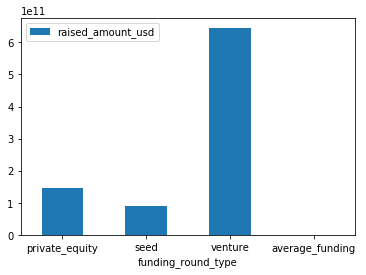

In [1352]:

df.reset_index(level=0, inplace=True)
df.plot.bar(x="funding_round_type",y="raised_amount_usd",rot=0)

__2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.__

In [1353]:
top9_country_byInvestment=pd.DataFrame(master_frame_category_sectors.groupby(["country_code"])["raised_amount_usd"].sum().nlargest(9)).rename(columns={'country_code':'raised_amount_usd'}).sort_values(by='raised_amount_usd', ascending=False)
top9_country_byInvestment

,raised_amount_usd
country_code,
USA,7.764523e+11
CHN,8.369062e+10
GBR,4.264138e+10
IND,3.377568e+10
CAN,2.362773e+10
DEU,1.741048e+10
ISR,1.249788e+10
RUS,1.215498e+10
FRA,1.113474e+10


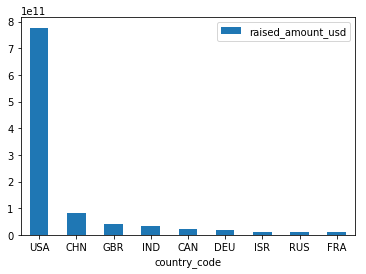

In [1354]:
top9_country_byInvestment.plot.bar(rot=0)

__3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). __

In [1355]:

# top 3 sector of USA , CHN , GBR
usaTop3_sectors=master_frame_category_sectors_USA.groupby(["Sectors"])["raised_amount_usd"].sum().nlargest(3).to_frame()
usaTop3_sectors.reset_index(level=0, inplace=True)


chnTop3_sectors=pd.DataFrame(master_frame_category_sectors[master_frame_category_sectors.country_code.isin(["CHN"])]).groupby(["Sectors"])["raised_amount_usd"].sum().nlargest(3).to_frame()
chnTop3_sectors.reset_index(level=0, inplace=True)


gbrTop3_sectors=pd.DataFrame(master_frame_category_sectors[master_frame_category_sectors.country_code.isin(["GBR"])]).groupby(["Sectors"])["raised_amount_usd"].sum().nlargest(3).to_frame()
gbrTop3_sectors.reset_index(level=0, inplace=True)


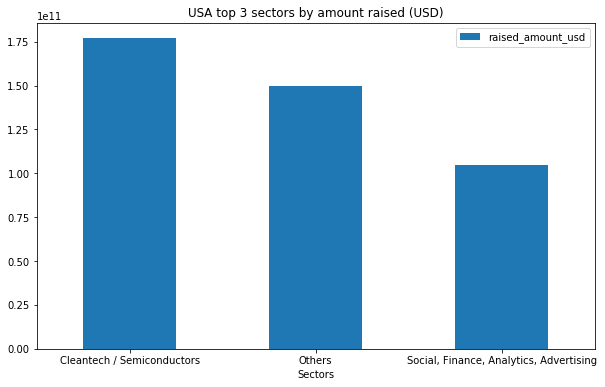

In [1356]:
plt.rcParams['figure.figsize']=(10,6)
usaTop3_sectors.plot.bar(x="Sectors",y="raised_amount_usd",rot=0,title="USA top 3 sectors by amount raised (USD)")

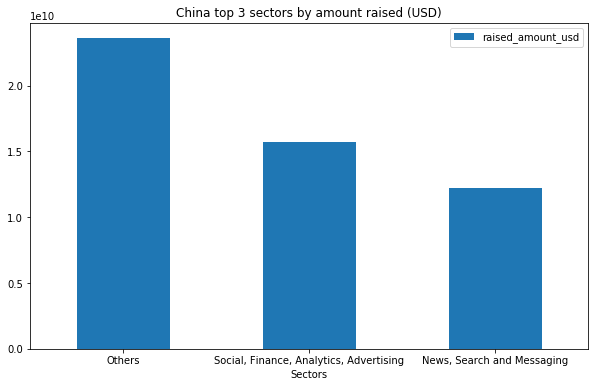

In [1357]:
chnTop3_sectors.plot.bar(x="Sectors",y="raised_amount_usd",rot=0,title="China top 3 sectors by amount raised (USD)")

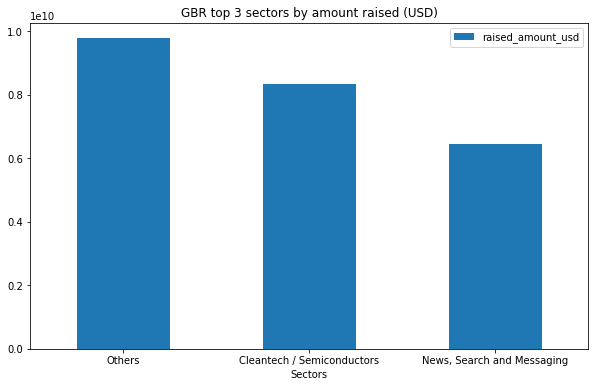

In [1358]:
gbrTop3_sectors.plot.bar(x="Sectors",y="raised_amount_usd",rot=0,title="GBR top 3 sectors by amount raised (USD)")

# ***********---------------- END --------------------*****************************